# Plotting

Spatialproteomics has a variety of plotting functions, enabling the plotting of intensities, segmentation masks, and predicted cell type labels.

In [76]:
%reload_ext autoreload
%autoreload 2

import spatialproteomics
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style='text')

In [77]:
# loading in a data set and performing some formatting for convenience
ds = xr.load_dataset('../../data/BNHL_166_4_I2_LK.zarr')
ds["_properties"] = ds["_labels"]
ds = ds.pp.drop_layers("_labels")

/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/meyerben/meyerben/.conda/envs/spatialproteomics_env/lib/python3.9/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [78]:
# having a look at the dataset
ds

<xarray.Dataset>
Dimensions:        (cells: 12560, channels: 56, y: 3000, x: 3000, features: 4,
                    labels: 8, props: 2)
Coordinates:
  * cells          (cells) int64 1 2 3 4 5 6 ... 12556 12557 12558 12559 12560
  * channels       (channels) <U11 'DAPI' 'Helios' 'CD10' ... 'CD79a' 'Ki-67'
  * features       (features) <U10 'centroid-0' 'centroid-1' ... '_original_'
  * labels         (labels) int64 1 2 3 4 5 6 7 8
  * props          (props) <U6 '_color' '_name'
  * x              (x) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
  * y              (y) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Data variables:
    _arcsinh_mean  (cells, channels) float64 3.111 0.0 1.391 ... 1.324 0.4174
    _arcsinh_sum   (cells, channels) float64 8.346 0.0 6.564 ... 6.625 5.224
    _image         (channels, y, x) uint8 4 4 4 4 5 4 4 3 4 ... 2 2 2 2 2 2 2 2
    _obs           (cells, features) float64 613.3 768.4 4.0 ... 8.0 7.0
    _raw_mean      (cells, channels) float64 56.02 0.0 9.426 ... 8.727 2.148
    _raw_sum       (cells, channels) float64 1.053e+04 0.0 ... 1.885e+03 464.0
    _segmentation  (y, x) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    _properties    (labels, props) object 'C3' ... 'B (PAX5)'

## Plotting channel intensities

The slicing capabilities of `xarray` make data visualization very easy. The general pattern is here to first select the channels, image regions and labels of interest, and then to use the plotting functions that are available via the `.pl` accessor. Images can be shown by using the `pl.show()` method.

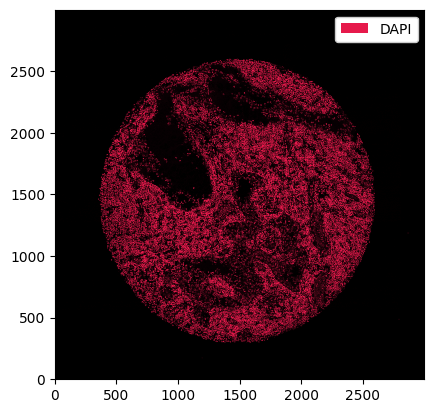

In [79]:
# selecting the DAPI channel and showing the result with pl.show()
_ = ds.pp['DAPI'].pl.show()

If we want different colors, we can specify those using the `pl.colorize` method.

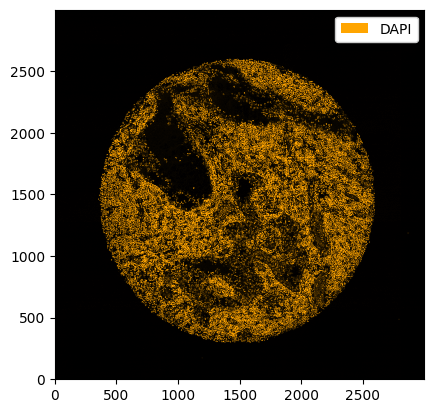

In [80]:
_ = ds.pp['DAPI'].pl.colorize(['orange']).pl.show()

The `pl.colorize` function allows us to make image overlays quickly by first selecting the channels of interest. We illustrate this by first selecting the CD4 and CD8 channels and then assigning the colors.

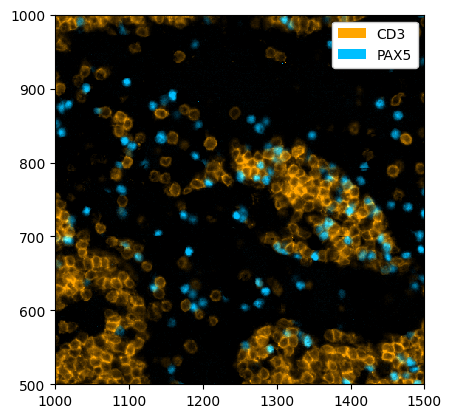

In [81]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show()

All plotting functions accept `matplotlib.Axes` via the `ax` argument. This enables to easily modify plots using the normal `matplotlib` API. For example, let's say we want to plot multiple channels in different subplots.

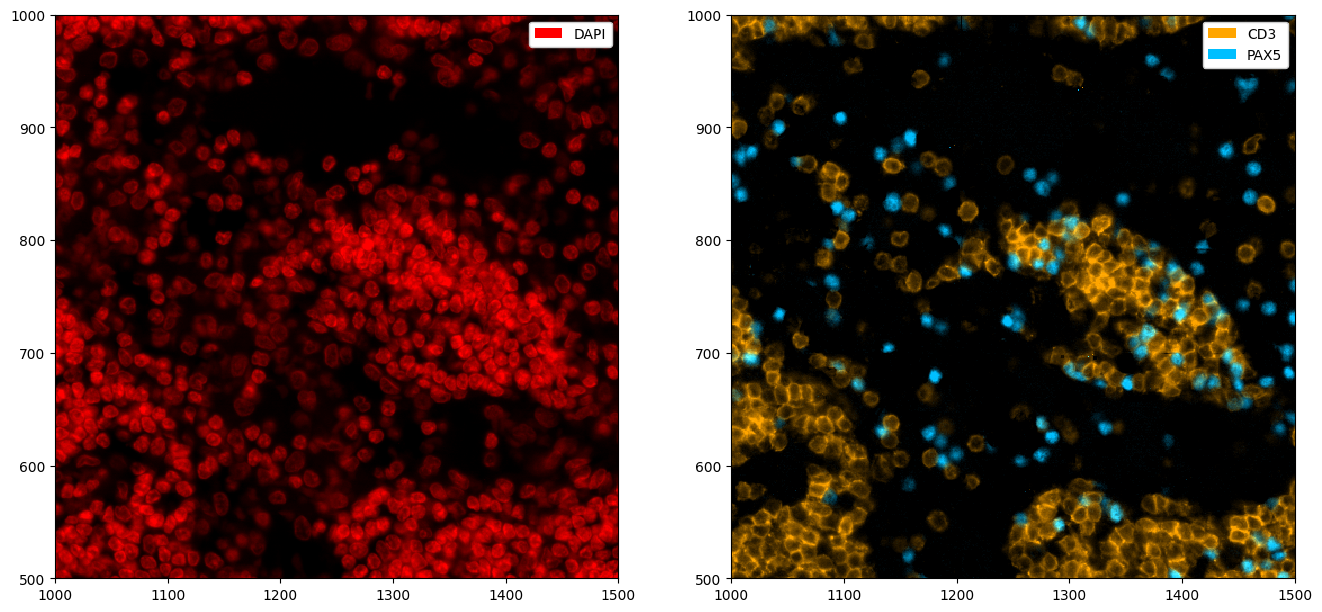

In [82]:
# creating two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# populating the first subplot
# note how we set ax=ax[0] to tell the plotting function to use the first subplot
_ = ds.pp['DAPI', 1000:1500, 500:1000].pl.colorize(colors=['red']).pl.show(ax=ax[0])
# populating the second subplot
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show(ax=ax[1])


By default, a legend showing the colors corresponding to the channels is shown. You can disable this with the `legend_image` argument. In addition, matplotlib functions can be used to further alter the plot, e. g. to remove ticklabels.
The code snipped below also highlights the `pl.autocrop()` function, which can be useful to remove empty space around a tissue microarray.

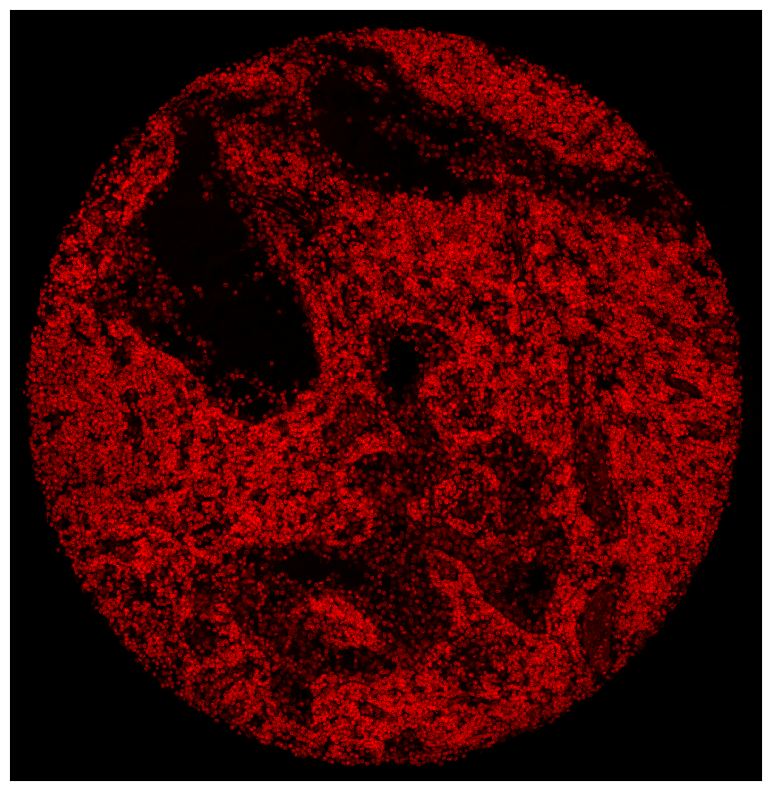

In [83]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp['DAPI'].pl.autocrop().pl.colorize(colors=['red']).pl.show(legend_image=False)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

## Rendering segmentation masks

If your spatialproteomics object contains a segmentation mask, you can simple plot it by setting `render_segmentation` to true.

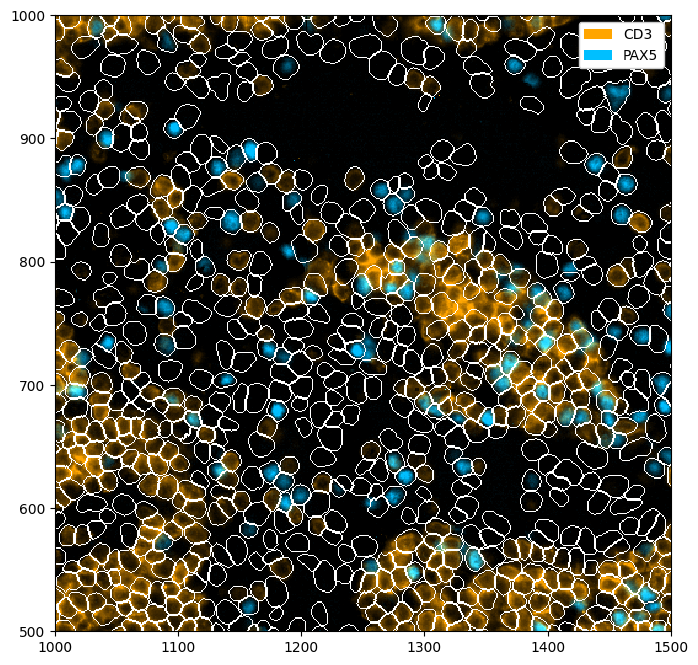

In [84]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show(render_segmentation=True)

## Rendering labels

Similar to `render_segmentation`, `pl.show()` also has an argument called `render_labels`, which can be used to render cell type labels. We can simultaneously deactivate the rendering of the intensities to get an image of only the labels.

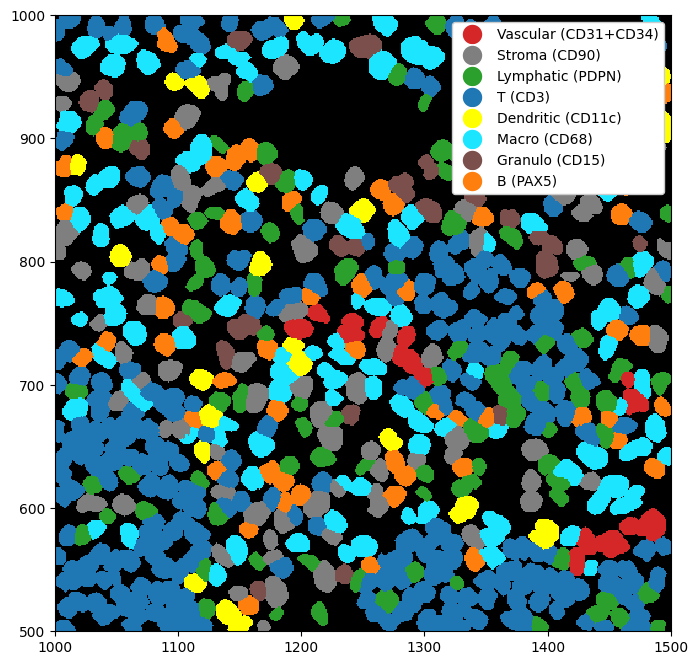

In [85]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[1000:1500, 500:1000].pl.show(render_image=False, render_labels=True)

We can combine this with rendering the segmentation masks for a clearer picture of where exactly the cell boundaries lie.

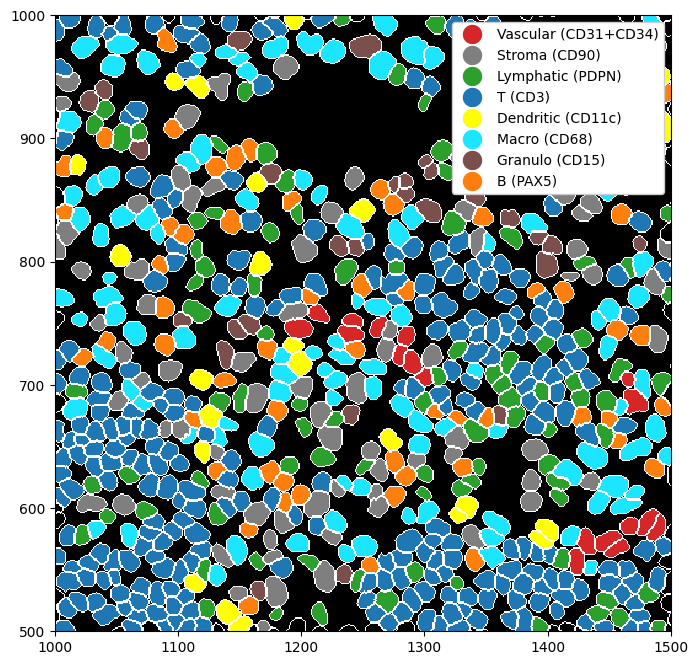

In [86]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[1000:1500, 500:1000].pl.show(render_image=False, render_segmentation=True, render_labels=True)

Using the `.la[]` accessor we can also subset cell labels, rather than displaying all of them. We can also use the `la.set_label_colors()` to set custom colors for our labels.

Found centroid-0 in _obs. Skipping.
Found centroid-1 in _obs. Skipping.


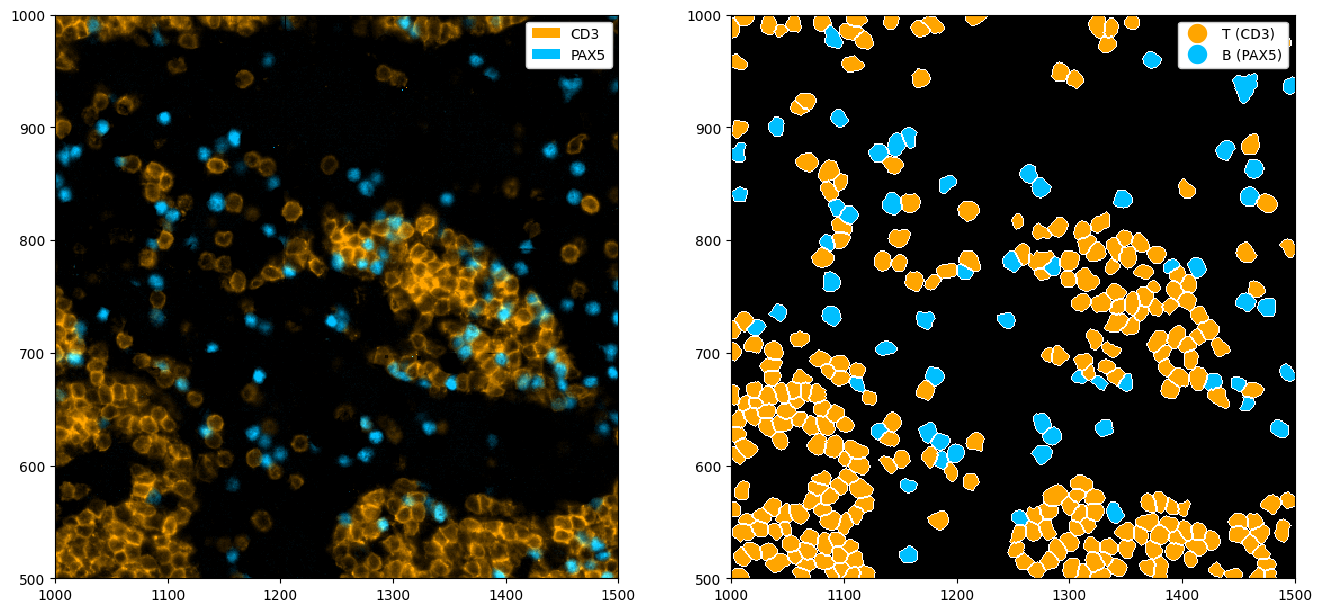

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(['orange', 'deepskyblue']).pl.show(ax=ax[0])
_ = ds.pp[1000:1500, 500:1000].la['T (CD3)', 'B (PAX5)'].la.set_label_colors(['T (CD3)', 'B (PAX5)'], ['orange', 'deepskyblue']).pl.show(render_image=False, render_segmentation=True, render_labels=True, ax=ax[1])

## Annotation of regions or cells

We can also annotate regions or cells within the plots.

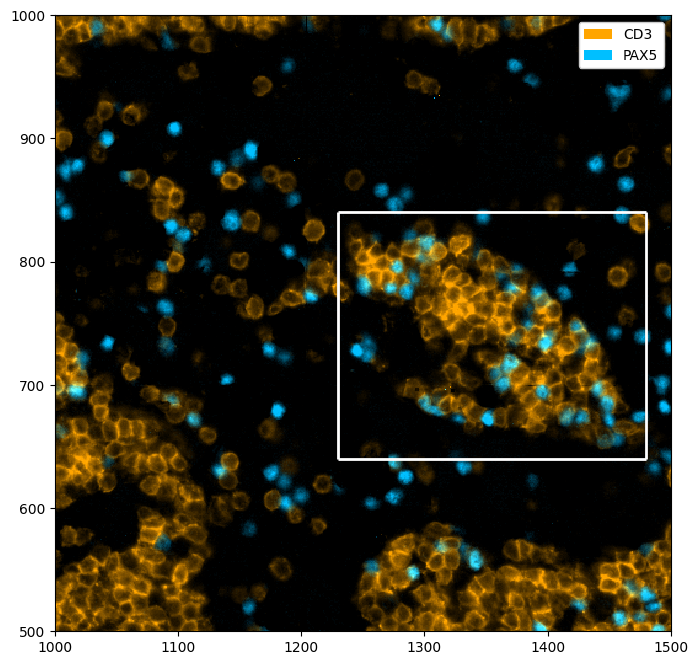

In [88]:
# highlighting a region with pl.add_box()
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.add_box([1230, 1480], [640, 840]).pl.show()

Found centroid-0 in _obs. Skipping.
Found centroid-1 in _obs. Skipping.


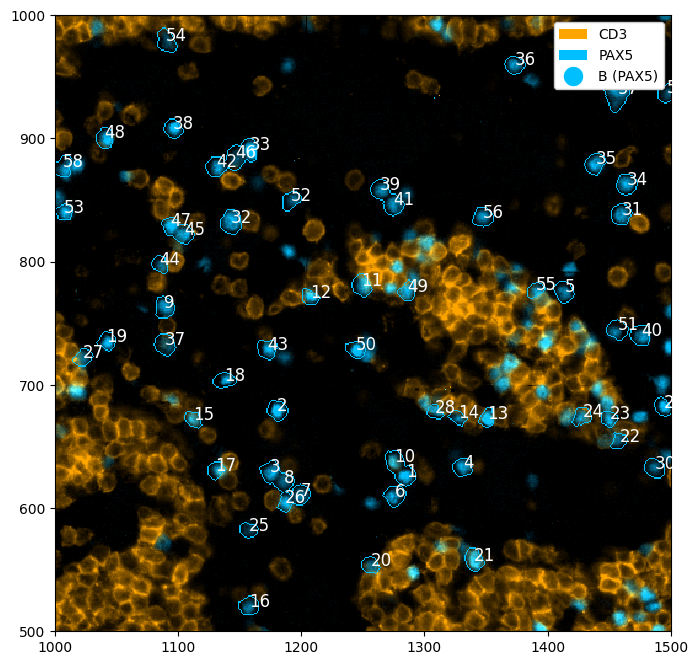

In [89]:
# selecting all B cells and annotating them with pl.annotate()
fig = plt.figure(figsize=(8, 8))
_ = (ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
       .la['B (PAX5)']
       .pl.colorize(colors=['orange', 'deepskyblue'])
       .la.set_label_colors(['B (PAX5)'], ['deepskyblue'])
       .pl.annotate()
       .pl.show(render_labels=True, label_kwargs={'alpha': 0.0}))

## Expert plotting

To gain more control over your plots, you can use the functions `colorize`, `render_segmentation`, and `render_labels` in combination with `imshow` (instead of `show`, which provides a high-level wrapper around these). Those methods allow for more nuanced adjustments of the final plot. Here are a few examples, for more details please consult the documentation of the corresponding methods.

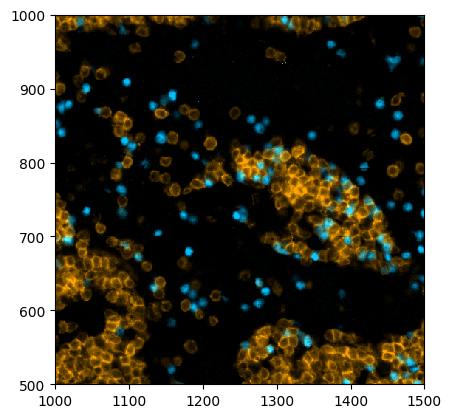

In [100]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.imshow()

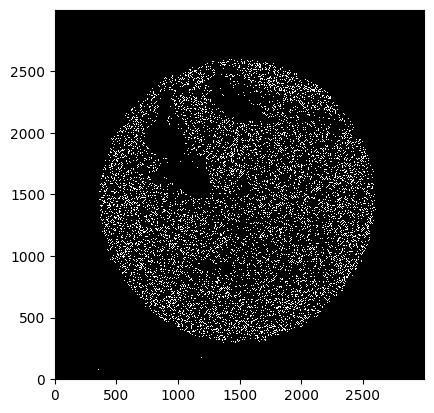

In [101]:
_ = ds.pl.render_segmentation().pl.imshow()

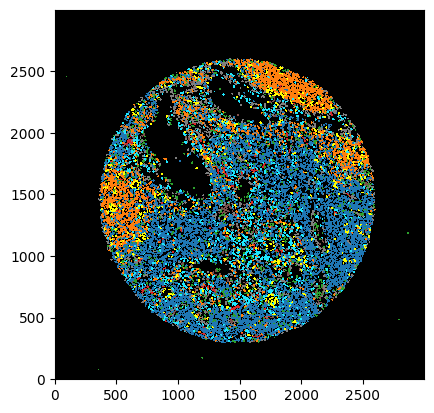

In [102]:
_ = ds.pl.render_labels().pl.imshow()

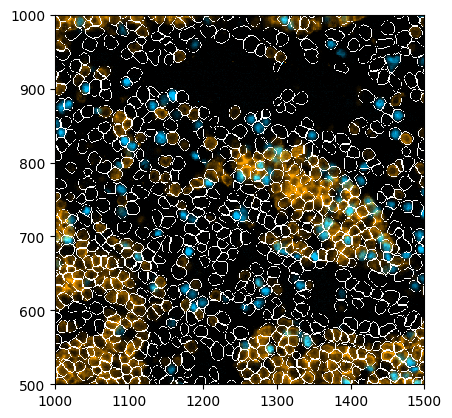

In [104]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.render_segmentation().pl.imshow()